In [116]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [160]:
listing_df = pd.read_csv('listings.csv')

In [28]:
reviews_df = pd.read_csv('reviews.csv')

In [29]:
neighborhoods_df = pd.read_csv('neighbourhoods.csv')

In [30]:
calendar_df = pd.read_csv('calendar.csv')

In [88]:
pd.set_option('display.max_columns', 20)

In [161]:
listing_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3191,Malleson Garden Cottage,3754,Brigitte,NaN,Ward 57,-33.94739,18.47600,Entire home/apt,819,3,54,2020-03-07,0.63,1,362
1,15007,Blaauwberg House,59072,Dirk,NaN,Ward 23,-33.80001,18.46063,Entire home/apt,2050,2,27,2019-08-18,0.34,4,251
2,15068,Grande Bay,59318,Linda,NaN,Ward 23,-33.78799,18.46082,Entire home/apt,2804,4,0,NaN,NaN,10,365
3,15077,Top relaxed beach living in style,59342,Georg,NaN,Ward 4,-33.85812,18.49043,Private room,1620,5,5,2016-12-10,0.06,5,208
4,15180,The Melkbaai - Beachfront,59663,Heinri,NaN,Ward 83,-34.11124,18.82349,Entire home/apt,575,2,0,NaN,NaN,1,365


In [150]:
listing_df.shape

(24079, 16)

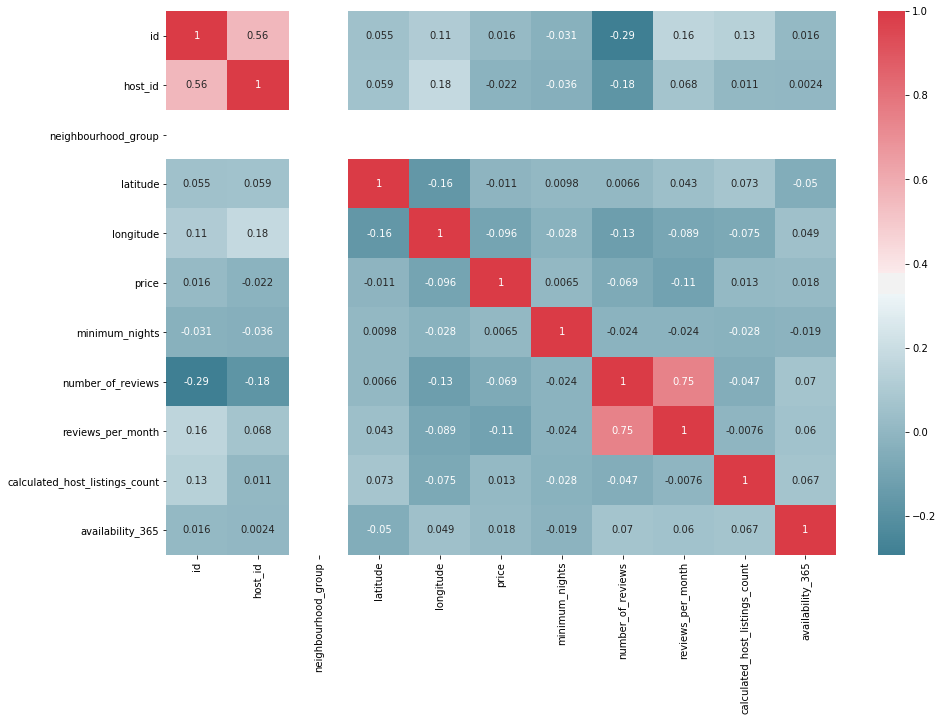

In [151]:
# Baseline Correlation heatmap 

def correlation_heatmap(df):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(listing_df)

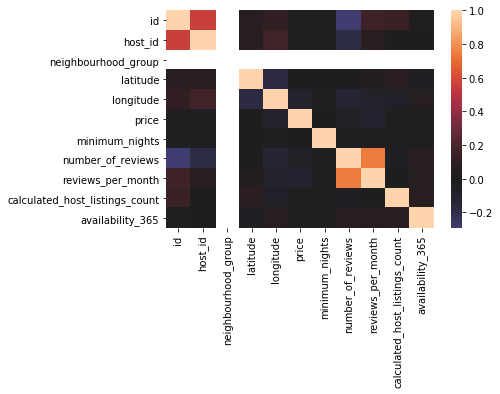

In [152]:
import seaborn as sns
sns.heatmap(listing_df.corr(), center=0);

In [162]:
#Dealing with NAs 
listing_df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             3
neighbourhood_group               24079
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        6823
reviews_per_month                  6823
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [163]:
#because the data set is over 24k, I decided to drop the nan values of reviews and last review (the same rows were nan for each)
listing_df.dropna(subset = ['reviews_per_month', 'last_review'], axis = 0, inplace = True)


In [164]:
listing_df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             1
neighbourhood_group               17256
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [165]:
listing_df.shape

(17256, 16)

In [166]:
listing_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3191,Malleson Garden Cottage,3754,Brigitte,NaN,Ward 57,-33.94739,18.47600,Entire home/apt,819,3,54,2020-03-07,0.63,1,362
1,15007,Blaauwberg House,59072,Dirk,NaN,Ward 23,-33.80001,18.46063,Entire home/apt,2050,2,27,2019-08-18,0.34,4,251
3,15077,Top relaxed beach living in style,59342,Georg,NaN,Ward 4,-33.85812,18.49043,Private room,1620,5,5,2016-12-10,0.06,5,208
5,15199,Self catering apartment,59694,Alexa,NaN,Ward 115,-33.91044,18.41239,Entire home/apt,124995,14,2,2016-04-15,0.03,1,364
6,15285,Waterford-Guinea Fowl Self Catering,59964,Chris+Alison,NaN,Ward 71,-34.03863,18.43128,Entire home/apt,1202,2,8,2019-12-30,0.08,3,303


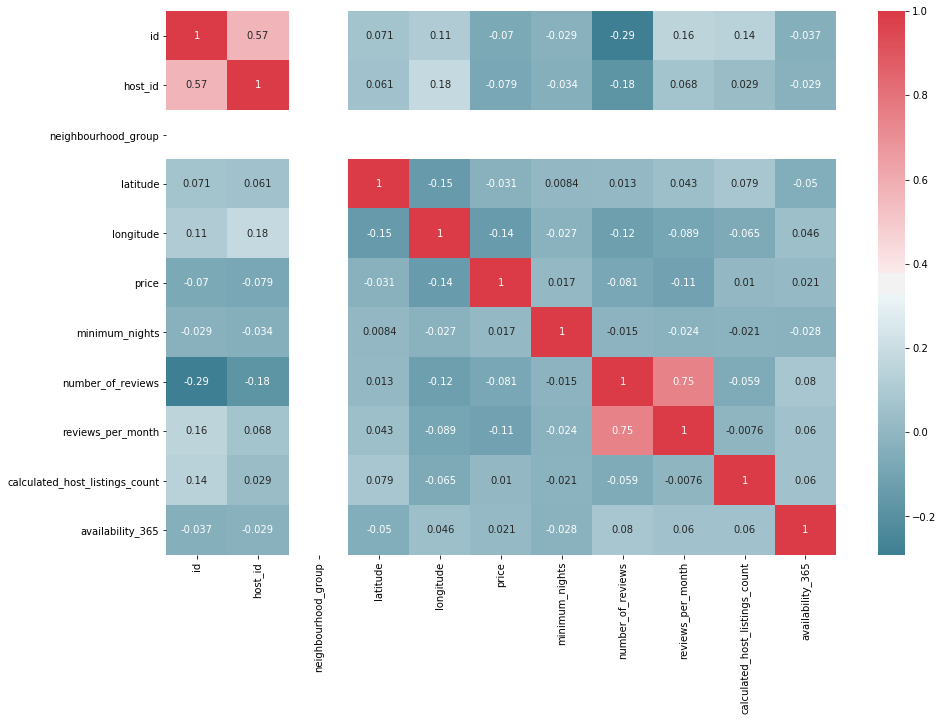

In [176]:
correlation_heatmap(listing_df)

In [168]:
#for neighbourhood_group I plan to imput values based on the Wards, grouping them by where in Capetown they are


In [169]:
#price 
listing_df.price = listing_df.price.map(lambda x: x/16.5)

In [171]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [173]:
listing_df.neighbourhood = listing_df.neighbourhood.map(lambda x: x.replace('Ward', ''))

In [175]:
listing_df.neighbourhood.astype(int)

0         57
1         23
3          4
5        115
6         71
        ... 
23836    115
23849      2
23852     54
23992      5
24065     54
Name: neighbourhood, Length: 17256, dtype: int64

In [ ]:
#city center wards df['city_center'] = wards == 77,54,115
City_Center = [74,77,54,57,59,58,60,47,46,48,49,52,51,53,56,
50,31,40,41,42,44,45]
Metro_North = []






Metro_South = 



